In [46]:
#Import required libraries
import pandas as pd
import numpy as np
from datetime import date, time, datetime
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from datetime import timezone, datetime

# 3rd party modules
import pandas as pd
import pytz

In [49]:
#Read data 
def read_data():
    data = pd.read_csv("KSFO.csv",low_memory=False)
    return data


In [50]:
fog_df = read_data()
fog_df.columns

Index(['station', 'valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i',
       'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4',
       'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes', 'ice_accretion_1hr',
       'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust',
       'peak_wind_drct', 'peak_wind_time', 'feel', 'metar'],
      dtype='object')

In [51]:
fog_df['valid'] = pd.to_datetime(fog_df['valid'], format='%d/%m/%Y %H:%M')
fog_df['valid'][3]
#fog_df['valid'] = pd.DatetimeIndex(fog_df['valid'],
#              dtype='datetime64[ns]', name='datetime', freq=None)


Timestamp('2017-01-01 00:15:00')

In [1]:
fog_df['Local time'] = fog_df['valid'].dt.tz_localize('UTC').dt.tz_convert('Australia/Melbourne')
fog_df

NameError: name 'fog_df' is not defined

In [53]:
fog_df['Visibility In M'] = fog_df.vsby * 1609.34

In [54]:
#unction to calculate the required columns
def calculate_columns():
    fog_df["Arrival Halted"] = np.where(fog_df['Visibility In M'] <= 5000,"Y", "N")
    fog_df["Departure Halted"] = np.where(fog_df['Visibility In M'] <= 1000,"Y", "N")
    fog_df["Date"] = pd.DatetimeIndex(fog_df["Format_Time"]).date
    fog_df["Yearv1"] =pd.DatetimeIndex(fog_df["Format_Time"]).year
    fog_df["Time"] = pd.DatetimeIndex(fog_df["Format_Time"]).time
    fog_df["Month"] = pd.DatetimeIndex(fog_df["Format_Time"]).month
    fog_df["Day"] = pd.DatetimeIndex(fog_df["Format_Time"]).day
    fog_df['DaySincePrevious'] = round((fog_df['Date'] -
                                           fog_df['Date'].shift(1)).dt.components.days)
    fog_df["Unique_Fog_Day_AH"] = ""
    fog_df["Fog_Period_AH"] = ""
    fog_df["Fog_Duration(hrs)_AH"] = ""
    fog_df["Unique_Fog_Day_DH"] = ""
    fog_df["Fog_Period_DH"] = ""
    fog_df["Fog_Duration(hrs)_DH"] = ""
calculate_columns()

In [55]:
#To check the format of the columns and data 
fog_df.info()
fog_df['Format_Time']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437114 entries, 0 to 437113
Data columns (total 46 columns):
 #   Column                Non-Null Count   Dtype                              
---  ------                --------------   -----                              
 0   station               437114 non-null  object                             
 1   valid                 437114 non-null  datetime64[ns]                     
 2   tmpf                  437114 non-null  object                             
 3   dwpf                  437114 non-null  object                             
 4   relh                  437114 non-null  object                             
 5   drct                  437114 non-null  object                             
 6   sknt                  437114 non-null  object                             
 7   p01i                  437114 non-null  object                             
 8   alti                  437114 non-null  object                             
 9   mslp

0        2016-12-31 16:00:00-08:00
1        2016-12-31 16:05:00-08:00
2        2016-12-31 16:10:00-08:00
3        2016-12-31 16:15:00-08:00
4        2016-12-31 16:20:00-08:00
                    ...           
437109   2020-12-05 11:56:00-08:00
437110   2020-12-05 12:56:00-08:00
437111   2020-12-05 13:56:00-08:00
437112   2020-12-05 14:56:00-08:00
437113   2020-12-05 15:56:00-08:00
Name: Format_Time, Length: 437114, dtype: datetime64[ns, America/Los_Angeles]

In [56]:
#Corrected Unique day logic for arrival halted values
def unique_days():
    unique_date = ""
    total_unique_days_AH = 0

    for index, row in fog_df.iterrows():    
        if fog_df.at[index,"Arrival Halted"] == "Y" and fog_df.at[index,"Date"] != unique_date:
            fog_df.at[index,"Unique_Fog_Day_AH"] = "TRUE"
            unique_date = fog_df.at[index,"Date"]
            total_unique_days_AH += 1
    return total_unique_days_AH


fog_df["Unique_Fog_Day_AH"]
fog_df


,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,Time,Month,Day,DaySincePrevious,Unique_Fog_Day_AH,Fog_Period_AH,Fog_Duration(hrs)_AH,Unique_Fog_Day_DH,Fog_Period_DH,Fog_Duration(hrs)_DH
0,SFO,2017-01-01 00:00:00,M,M,M,0,0,M,29.93,M,...,16:00:00,12,31,NaN,,,,,,
1,SFO,2017-01-01 00:05:00,M,M,M,0,0,M,29.93,M,...,16:05:00,12,31,0.0,,,,,,
2,SFO,2017-01-01 00:10:00,M,M,M,0,0,M,29.94,M,...,16:10:00,12,31,0.0,,,,,,
3,SFO,2017-01-01 00:15:00,M,M,M,0,0,M,29.94,M,...,16:15:00,12,31,0.0,,,,,,
4,SFO,2017-01-01 00:20:00,M,M,M,0,0,M,29.94,M,...,16:20:00,12,31,0.0,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437109,SFO,2020-12-05 19:56:00,57.9,46,64.47,0,0,0,30.23,1023.8,...,11:56:00,12,5,0.0,,,,,,
437110,SFO,2020-12-05 20:56:00,55.9,45,66.72,350,7,0,30.23,1023.5,...,12:56:00,12,5,0.0,,,,,,
437111,SFO,2020-12-05 21:56:00,59,43,55.28,350,7,0,30.21,1022.9,...,13:56:00,12,5,0.0,,,,,,
437112,SFO,2020-12-05 22:56:00,60.1,46.9,61.65,10,3,0,30.22,1023.3,...,14:56:00,12,5,0.0,,,,,,


In [57]:
#Logic to calculate the fog hours for arrival halted values 
for index, row in fog_df.iterrows():
    if index == 0:
         if fog_df.at[index,"Arrival Halted"] == "Y":
            fog_df.at[index,"Fog_Period_AH"] = "start"   
    else:
        if (fog_df.at[index,"Arrival Halted"] == "Y" and fog_df.at[index-1,"Arrival Halted"] == "N"):
            fog_df.at[index,"Fog_Period_AH"] = "start"
        elif fog_df.at[index,"Arrival Halted"] == "N" and fog_df.at[index-1,"Arrival Halted"] == "Y":
            fog_df.at[index,"Fog_Period_AH"] = "end"
        elif fog_df.at[index, "Arrival Halted"] == "Y" and fog_df.at[index,"DaySincePrevious"] >1:
            fog_df.at[index, "Fog_Period_AH"] = "start"
            fog_df.at[index-1, "Fog_Period_AH"] = "end"
        
fog_df['Fog_Period_AH']

0          
1          
2          
3          
4          
         ..
437109     
437110     
437111     
437112     
437113     
Name: Fog_Period_AH, Length: 437114, dtype: object

In [11]:
#fog hours calculation for arrival halted values 
start_period = ""
end_period = "" 
total_hours_AH = 0

for index, row in fog_df.iterrows():    
    if fog_df.at[index,"Fog_Period_AH"] == "start":
        start_period = fog_df.at[index,"Format_Time"]
    elif fog_df.at[index,"Fog_Period_AH"] == "end":
        end_period = fog_df.at[index-1,"Format_Time"]
        if end_period == start_period:
            end_period = fog_df.at[index,"Format_Time"]
        else:
            end_period = fog_df.at[index-1,"Format_Time"]
        timeDelta = (end_period - start_period) 
        #print(timeDelta)
        if timeDelta.components.days >= 0 and timeDelta.components.days <= 1:
            fog_duration = (timeDelta.components.days*24) + timeDelta.components.hours + timeDelta.components.minutes / 60
            fog_df.at[index,"Fog_Duration(hrs)_AH"] = fog_duration
        else:
            fog_duration =  timeDelta.components.hours + timeDelta.components.minutes / 60
            fog_df.at[index,"Fog_Duration(hrs)_AH"] = fog_duration
        print(fog_duration)
        total_hours_AH += fog_duration
        

0.3333333333333333
0.3333333333333333
0.08333333333333333
0.08333333333333333
0.08333333333333333
0.06666666666666667
0.5666666666666667
0.5833333333333334
0.25
0.16666666666666666
0.75
0.6666666666666666
0.08333333333333333
0.08333333333333333
1.0166666666666666
0.08333333333333333
1.3333333333333333
0.16666666666666666
0.08333333333333333
0.08333333333333333
0.016666666666666666
0.6666666666666666
0.08333333333333333
0.3333333333333333
0.08333333333333333
0.08333333333333333
0.25
0.5
0.4
0.08333333333333333
0.4166666666666667
0.9166666666666666
0.25
0.08333333333333333
0.16666666666666666
0.08333333333333333
0.5
0.08333333333333333
1.1666666666666667
1.5833333333333335
0.08333333333333333
0.3333333333333333
0.9166666666666666
0.35
0.4166666666666667
0.1
0.03333333333333333
0.25
0.08333333333333333
0.6666666666666666
0.08333333333333333
0.43333333333333335
0.25
0.13333333333333333
0.05
0.08333333333333333
0.06666666666666667
0.15
0.05
0.5166666666666667
0.08333333333333333
0.016666666

In [12]:
def unique_days_DH():
    unique_date = ""
    total_unique_days_DH = 0

    for index, row in fog_df.iterrows():    
        if fog_df.at[index,"Departure Halted"] =="Y" and fog_df.at[index,"Date"] != unique_date:
            fog_df.at[index,"Unique_Fog_Day_DH"] = "TRUE"
            unique_date = fog_df.at[index,"Date"]
            total_unique_days_DH += 1
    return total_unique_days_DH

In [13]:
#Logic to calculate the fog hours for arrival halted values 
for index, row in fog_df.iterrows():
    if index == 0:
         if fog_df.at[index,"Departure Halted"] == "Y":
            fog_df.at[index,"Fog_Period_DH"] = "start"   
    else:
        if (fog_df.at[index,"Departure Halted"] == "Y" and fog_df.at[index-1,"Departure Halted"] == "N"):
            fog_df.at[index,"Fog_Period_DH"] = "start"
        elif fog_df.at[index,"Departure Halted"] == "N" and fog_df.at[index-1,"Departure Halted"] == "Y":
            fog_df.at[index,"Fog_Period_DH"] = "end"
        elif fog_df.at[index, "Departure Halted"] == "Y" and fog_df.at[index,"DaySincePrevious"] >1:
            fog_df.at[index, "Fog_Period_DH"] = "start"
            fog_df.at[index-1, "Fog_Period_DH"] = "end"
        
fog_df['Fog_Period_DH']

0          
1          
2          
3          
4          
         ..
437109     
437110     
437111     
437112     
437113     
Name: Fog_Period_DH, Length: 437114, dtype: object

In [14]:
#fog hours calculation for arrival halted values 

start_period = ""
end_period = "" 
total_hours_DH = 0

for index, row in fog_df.iterrows():    
    if fog_df.at[index,"Fog_Period_DH"] == "start":
        start_period = fog_df.at[index,"Format_Time"]
    elif fog_df.at[index,"Fog_Period_DH"] == "end":
        end_period = fog_df.at[index-1,"Format_Time"]
        if end_period == start_period:
            end_period = fog_df.at[index,"Format_Time"]
        else:
            end_period = fog_df.at[index-1,"Format_Time"]
        timeDelta = (end_period - start_period) 
        #print(timeDelta)
        if timeDelta.components.days >= 0 and timeDelta.components.days <= 1:
            fog_duration = (timeDelta.components.days*24) + timeDelta.components.hours + timeDelta.components.minutes / 60
            fog_df.at[index,"Fog_Duration(hrs)_DH"] = fog_duration
        else:
            fog_duration =  timeDelta.components.hours + timeDelta.components.minutes / 60
            fog_df.at[index,"Fog_Duration(hrs)_DH"] = fog_duration
        print(fog_duration)
        total_hours_DH += fog_duration

1.0
2.1666666666666665
0.016666666666666666
0.1
0.5
0.15
1.5333333333333332
1.1666666666666667
0.05
0.08333333333333333
1.3333333333333333
2.6166666666666667
0.7166666666666667
1.4
0.55
2.25
0.16666666666666666
1.0833333333333333
0.9166666666666666
0.6333333333333333
0.08333333333333333
0.06666666666666667
2.1333333333333333
0.08333333333333333
3.3333333333333335
4.933333333333334
0.16666666666666666
4.433333333333334
1.3666666666666667
0.4166666666666667
0.08333333333333333
2.5
1.0
1.7333333333333334
0.2833333333333333
0.31666666666666665
1.7833333333333332
2.5166666666666666
0.06666666666666667
0.016666666666666666
0.16666666666666666
0.06666666666666667
0.9166666666666666
0.31666666666666665
0.95
0.7166666666666667
1.0
0.08333333333333333
5.0


In [60]:
print("Total Unique Days:",unique_days()/3)
print("Total Fog Hours:",total_hours_AH/3)
print("Total Unique Days:",unique_days_DH()/3)
print("Total Fog Hours:",total_hours_DH/3)

Total Unique Days: 84.66666666666667
Total Fog Hours: 186.92222222222202
Total Unique Days: 9.0
Total Fog Hours: 18.322222222222226


In [15]:
fog_df.to_csv(r'C:\Users\emily\OneDrive\Desktop\KSFO_edited.csv')

In [126]:
#Arrival affected Data for plots
AH_Uniqueday_data = fog_df[fog_df.Unique_Fog_Day_AH != ""].groupby(["Yearv1",'Month'])['Unique_Fog_Day_AH'].count().reset_index().rename({'count': 'Arrival Halted < 3000m'})

In [127]:
#Departure affected data for plots
DH_Uniqueday_data = fog_df[fog_df.Unique_Fog_Day_DH != ""].groupby(["Yearv1",'Month'])['Unique_Fog_Day_DH'].count().reset_index().rename({'count': 'Departure Halted < 800m'})

In [128]:
DH_Uniqueday_data.columns = ['Year', 'Month', 'Departure Halted (< 800m)']
DH_Uniqueday_data_2019 = DH_Uniqueday_data[DH_Uniqueday_data.Year == 2019]

In [129]:
DH_Uniqueday_data_2019

,Year,Month,Departure Halted (< 800m)
48,2019,1,3
49,2019,2,8
50,2019,3,11
51,2019,4,15
52,2019,5,17
53,2019,6,15
54,2019,7,16
55,2019,8,13
56,2019,9,12
57,2019,10,5


In [130]:
AH_Uniqueday_data.columns = ['Year', 'Month', 'Arrival Halted (< 3000m)']
AH_Uniqueday_data_2019 = AH_Uniqueday_data[AH_Uniqueday_data.Year == 2019]
AH_Uniqueday_data_2019

,Year,Month,Arrival Halted (< 3000m)
48,2019,1,8
49,2019,2,13
50,2019,3,16
51,2019,4,22
52,2019,5,19
53,2019,6,20
54,2019,7,18
55,2019,8,13
56,2019,9,12
57,2019,10,9


In [131]:
stack_plot_data = pd.merge(DH_Uniqueday_data_2019,AH_Uniqueday_data_2019)

In [132]:
stack_plot_data

,Year,Month,Departure Halted (< 800m),Arrival Halted (< 3000m)
0,2019,1,3,8
1,2019,2,8,13
2,2019,3,11,16
3,2019,4,15,22
4,2019,5,17,19
5,2019,6,15,20
6,2019,7,16,18
7,2019,8,13,13
8,2019,9,12,12
9,2019,10,5,9


In [144]:
stack_plot_data['Arrival Halted (800m-3000m)'] = stack_plot_data['Arrival Halted (< 3000m)'] - stack_plot_data['Departure Halted (< 800m)']

In [145]:
stack_plot_data

,Year,Month,Departure Halted (< 800m),Arrival Halted (< 3000m),Arrival Halted (800m-300m),Arrival Halted (800m-3000m)
0,2019,Jan,3,8,5,5
1,2019,Feb,8,13,5,5
2,2019,Mar,11,16,5,5
3,2019,Apr,15,22,7,7
4,2019,May,17,19,2,2
5,2019,Jun,15,20,5,5
6,2019,Jul,16,18,2,2
7,2019,Aug,13,13,0,0
8,2019,Sep,12,12,0,0
9,2019,Oct,5,9,4,4


In [146]:
Months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

In [147]:
stack_plot_data['Month'] = Months

In [148]:
stack_plot_data

,Year,Month,Departure Halted (< 800m),Arrival Halted (< 3000m),Arrival Halted (800m-300m),Arrival Halted (800m-3000m)
0,2019,Jan,3,8,5,5
1,2019,Feb,8,13,5,5
2,2019,Mar,11,16,5,5
3,2019,Apr,15,22,7,7
4,2019,May,17,19,2,2
5,2019,Jun,15,20,5,5
6,2019,Jul,16,18,2,2
7,2019,Aug,13,13,0,0
8,2019,Sep,12,12,0,0
9,2019,Oct,5,9,4,4


Text(0.5, 1.0, 'Lismore Airport')

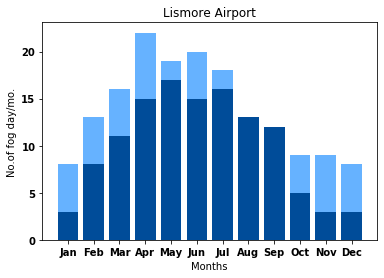

In [157]:
# y-axis in bold
plt.xlabel("Months")
plt.bar(stack_plot_data['Month'], stack_plot_data['Departure Halted (< 800m)'], color = '#004C99')
plt.bar(stack_plot_data['Month'], stack_plot_data['Arrival Halted (800m-3000m)'],  bottom = stack_plot_data['Departure Halted (< 800m)'], color = '#66B2FF')

plt.xlabel("Months")
plt.ylabel("No.of fog day/mo.")
plt.title("Lismore Airport")